# Project(P127) on Combined-Cycle Power Plant

## 1. Business Objective:
   A **Combined Cycle Power Plant** comprises gas turbines,steam turbines and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then it is transferred from one turbine to another. 
   **We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance**

## 2. Data Set Details:
   This is a project where **the variable to be predicted is "energy production"**
   The data file contains **9568** observations with **five variables** collected from a Combined Cycle Power Plant over six years when power plant was set to work with a full load

### The Variables or Features
* **temperature** - in degrees Celsius
* **exhaust_vaccum** - in cm Hg
* **amb_pressure(Ambient Pressure)** - in millibar
* **r_humidity(Relative humidity)** - in percentage
* **energy_production** - in MW(Million watts)
net hourly electrical energy output

## 3. Dependent and Independent Variables

### Independent variable

Independent variable is also called **Input variable** and is denoted by **X**. In practical applications, independent variable is also called **Feature variable or Predictor variable**. We can denote it as: -

* *Independent or Input variable (X) = Feature variable = Predictor variable*

### Dependent variable

Dependent variable is also called **Output variable** and is denoted by **y**. Dependent variable is also called **Target variable or Response variable**. It can be denoted it as follows: -

* *Dependent or Output variable (y) = Target variable = Response variable*

## 4. Import Necessary Libraries

In [2]:
!pip install pandas_profiling
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shaik\\AppData\\Roaming\\Python\\Python39\\site-packages\\~3rkupsafe\\_speedups.cp39-win_amd64.pyd'
Check the permissions.




  Using cached MarkupSafe-2.1.1-cp39-cp39-win_amd64.whl (17 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
#conda install -c conda-forge pandas-profiling

In [10]:
#!pip install -U pandas-profiling

In [ ]:
#EDA_report= pp.ProfileReport(ccpp)
#EDA_report.to_file(output_file='ccpp.html')

In [6]:
#sweet_report = sv.analyze(ccpp)
#sweet_report.show_html('ccpp_report.html')

##### =================================================================================================================

## 5. Import Data

In [4]:
ccpp=pd.read_csv('energy_production.csv', sep=';' )
ccpp

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


## 6. Exploratory Data Analysis( EDA)

In [5]:
#!pip install dtale

In [6]:
#import dtale

In [7]:
#dtale.show(ccpp,open_browser=True)
#dtale.show(ccpp)

In [8]:
#my_report = sv.analyze([ccpp, "Energy_production"],target_feat='energy_production')
#my_report.show_html('Report.html')

In [9]:
#It gives the number of rows and columns of the dataset
ccpp.shape

(9568, 5)

In [10]:
#shows the null values
ccpp.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [11]:
#Data types of each feature/column
ccpp.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [12]:
#Shows the overall information of the dataset
ccpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [13]:
#To get the descriptive statistics of the dataset
ccpp.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [14]:
#Checking whether the dataset contains the duplicates or not
dup=ccpp[ccpp.duplicated()]
dup.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24


In [15]:
#Returns the count of duplicates
dup.shape

(41, 5)

In [16]:
#Droping the duplicates
ccpp1=ccpp.drop_duplicates()
ccpp1

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [17]:
#Shape of the dataset after removing the duplicated rows
ccpp1.shape

(9527, 5)

### No Auto correlation

In [18]:
corr_matrix=ccpp.corr()
corr_matrix
#Multiple linear regression assumes that none of the predictor variables(X) are highly correlated with each other.

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


Text(0.5, 1.0, 'Heat Map depicting the correlation between Features')

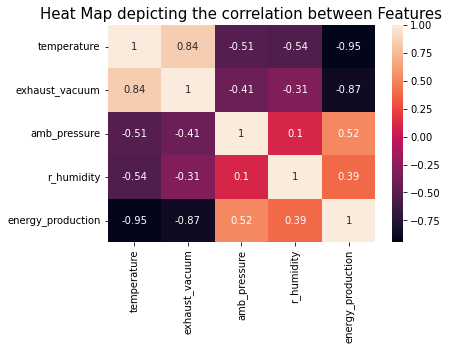

In [19]:
sns.heatmap(ccpp.corr(),annot=True)
plt.title("Heat Map depicting the correlation between Features",size = 15)

In [20]:
corr_matrix['energy_production'].sort_values(ascending=False)

energy_production    1.000000
amb_pressure         0.518429
r_humidity           0.389794
exhaust_vacuum      -0.869780
temperature         -0.948128
Name: energy_production, dtype: float64

### Interpretation of correlation coefficient

* The correlation coefficient **ranges from -1 to +1.**

When it is close to +1, this signifies that there is a positive correlation. So, we can see that there is a strong positive correlation between **energy_production and amb_pressure**

When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is strong negative correlation between **energy_production and exhaust_vacuum, temperature** 

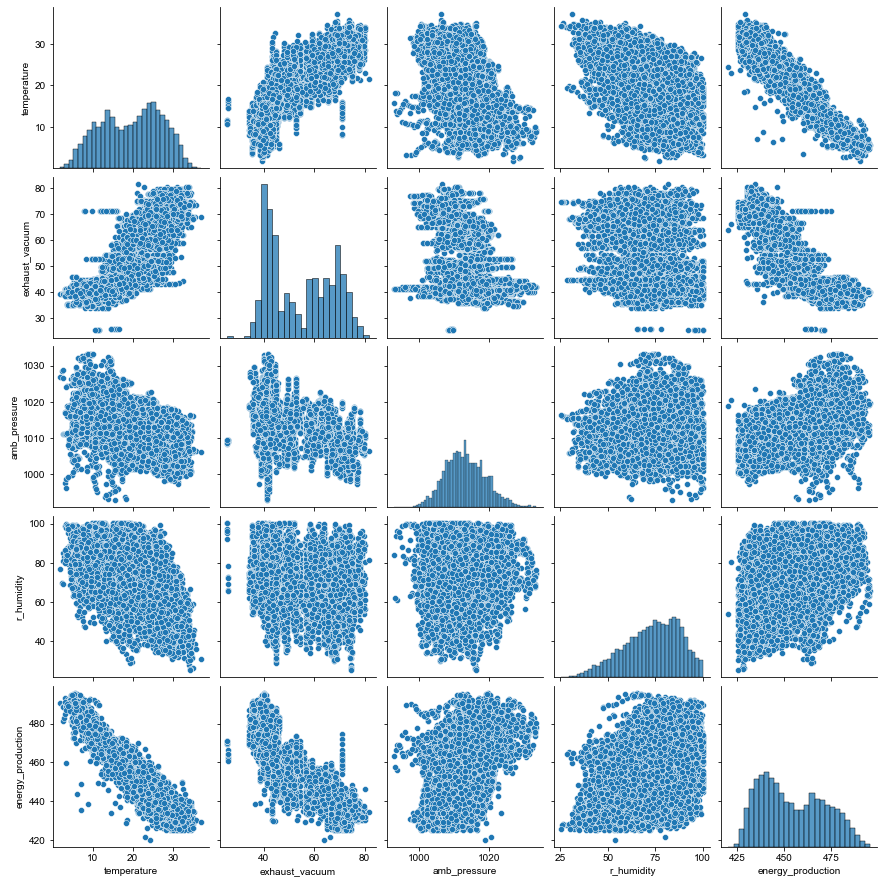

In [21]:
sns.pairplot(ccpp)
sns.set_theme(style='darkgrid')

### Observation:
   * Exhaust_vaccum and temperature are highly correalated in predictors(**Multi collinearity occurs**)
   * As Temperature increases, Energy production decreases ( Temperature & Energy Production are Inversely proportional)**Negatively correlated**
   * As Exhaust_vacuum increases, Energy production decreases ( Exhaust_vacuum & Energy production are Inversely proportional)**Negatively correlated**
  

## 6.1 Outliers Detection

## Through Box Plot

In [22]:
ccpp.head(3)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48


### Boxplot for All Features

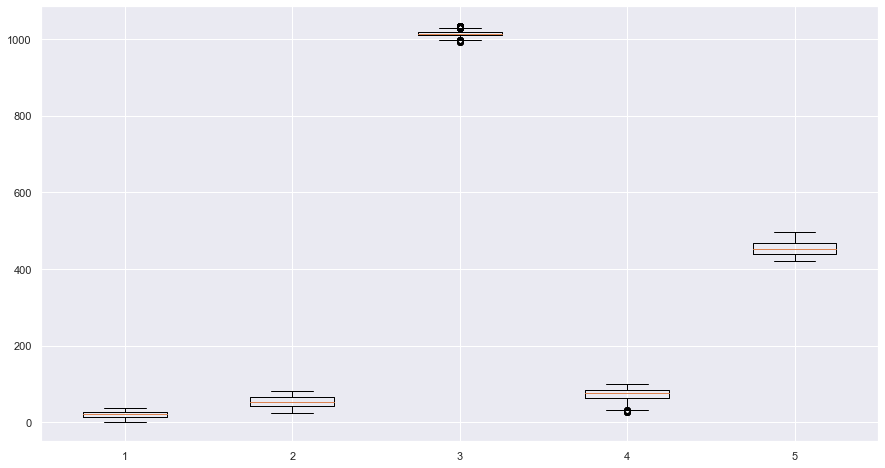

In [23]:
plt.figure(figsize=(15,8))
plt.boxplot(ccpp1,vert=True)
plt.show()

### 1.Temperature

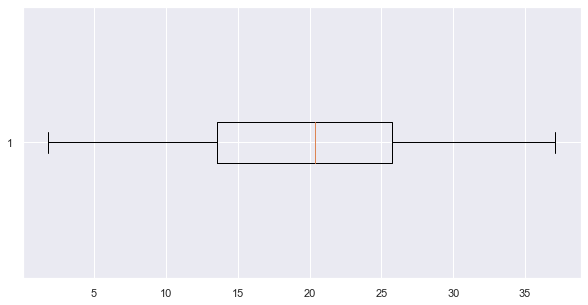

In [24]:
plt.figure(figsize=(10,5))
plt.boxplot(ccpp1['temperature'],vert=False)
plt.show()

### 2.Exhaust_vacuum

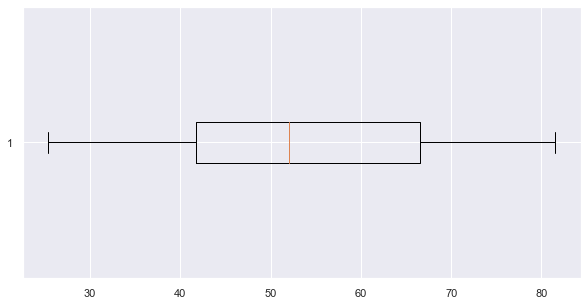

In [25]:
plt.figure(figsize=(10,5))
plt.boxplot(ccpp1['exhaust_vacuum'],vert=False)
plt.show()

### 3.Ambient_pressure

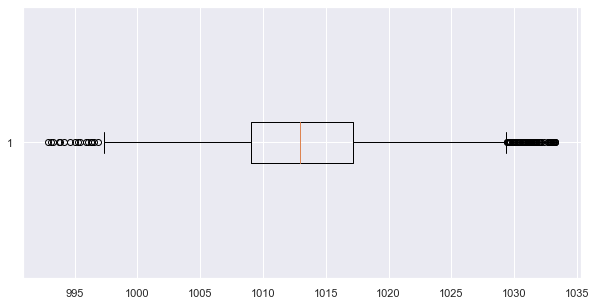

In [26]:
plt.figure(figsize=(10,5))
plt.boxplot(ccpp1['amb_pressure'],vert=False)
plt.show()

### 4.Relative_humidity

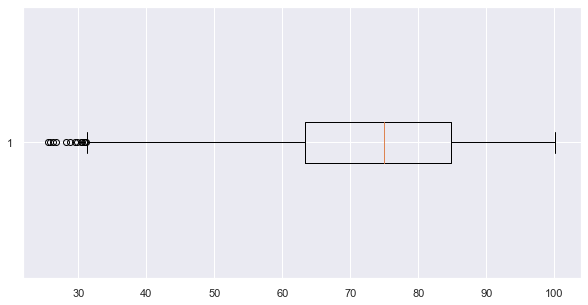

In [27]:
plt.figure(figsize=(10,5))
plt.boxplot(ccpp1['r_humidity'],vert=False)
plt.show()

### 5.Energy_production

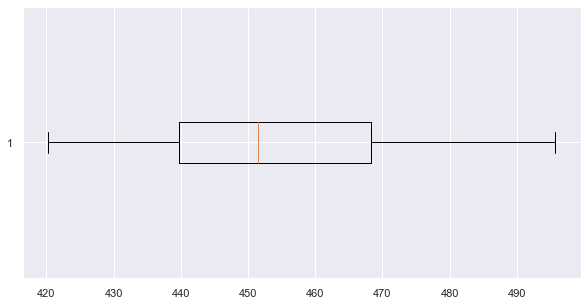

In [28]:
plt.figure(figsize=(10,5))
plt.boxplot(ccpp1['energy_production'],vert=False)
plt.show()

### Observation: 
 2 features are having outliers present in it
  From the 5 features
    
      1. temperature
      2.exhaust_vacuum
   **3.amb_pressure(Outliers)**
   
   **4.r_humidity(Outliers)**
   
      5.energy_production

### amb_pressure(Outliers)

In [29]:
Q1 = ccpp1.amb_pressure.quantile(0.25)
Q3 = ccpp1.amb_pressure.quantile(0.75)
Q1,Q3

(1009.085, 1017.2)

In [30]:
IQR = Q3-Q1
print(IQR)

8.115000000000009


In [31]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(996.9125, 1029.3725)

In [32]:
ccpp1[(ccpp1.amb_pressure<lower_limit)|(ccpp1.amb_pressure>upper_limit)]


,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
38,9.95,41.82,1033.09,69.44,477.52
175,9.06,41.92,1029.90,90.88,473.37
315,14.46,42.86,1031.34,69.84,464.44
319,14.58,41.92,1030.42,61.96,462.69
385,14.20,42.86,1031.96,69.59,468.63
...,...,...,...,...,...
9093,9.42,41.40,1030.38,87.80,472.99
9125,7.66,41.92,1031.96,82.48,485.11
9331,5.97,36.25,1029.65,86.74,487.03
9368,14.31,42.86,1031.14,69.60,465.36


### Inference:
   >>* So we have 91 outliers in ambient pressure

In [33]:
ccpp1= ccpp1[(ccpp1.amb_pressure>lower_limit)&(ccpp1.amb_pressure<upper_limit)]

<AxesSubplot:>

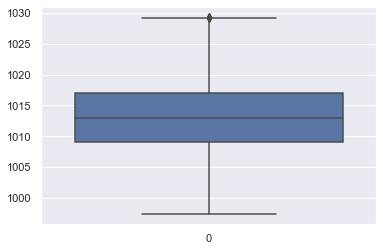

In [34]:
sns.boxplot(data=ccpp1['amb_pressure'])

In [35]:
Q1 = ccpp1.amb_pressure.quantile(0.25)
Q3 = ccpp1.amb_pressure.quantile(0.75)
Q1,Q3

(1009.0675, 1017.08)

In [36]:
IQR = Q3-Q1
print(IQR)

8.012500000000045


In [37]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(997.0487499999999, 1029.09875)

In [38]:
ccpp1[(ccpp1.amb_pressure<lower_limit)|(ccpp1.amb_pressure>upper_limit)]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2539,13.92,44.47,1029.36,70.86,467.29
3290,9.42,41.40,1029.21,86.40,474.75
4027,9.45,41.92,1029.32,91.09,467.79
5624,9.39,40.11,1029.14,77.29,473.05
6582,14.01,42.74,1029.16,68.31,466.15
7438,8.72,36.25,1029.31,85.73,479.94
7593,9.09,41.92,1029.36,91.00,478.98


### Inference:
   >>* Here again we got 7 outliers

In [39]:
ccpp1= ccpp1[(ccpp1.amb_pressure>lower_limit)&(ccpp1.amb_pressure<upper_limit)]

<AxesSubplot:>

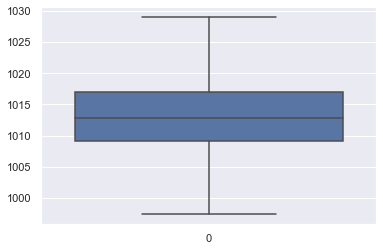

In [40]:
sns.boxplot(data=ccpp1['amb_pressure'])

### Observation:
   So now those outliers are cleared

## r_humidity outliers

In [41]:
Q1 = ccpp1.r_humidity.quantile(0.25)
Q3 = ccpp1.r_humidity.quantile(0.75)
Q1,Q3

(63.25, 84.84)

In [42]:
IQR = Q3-Q1
print(IQR)

21.590000000000003


In [43]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(30.864999999999995, 117.22500000000001)

In [44]:
ccpp1[(ccpp1.r_humidity<lower_limit)|(ccpp1.r_humidity>upper_limit)]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
30,33.94,74.67,1015.94,28.16,427.98
233,34.65,74.67,1016.03,26.67,427.69
400,35.01,74.67,1016.10,26.30,428.48
1154,34.30,74.67,1015.98,25.89,427.84
1254,19.78,44.71,1015.70,29.43,465.49
1814,19.31,44.71,1016.13,30.59,463.00
5674,33.83,67.90,1005.94,29.86,428.12
6048,34.18,67.90,1005.87,30.34,425.50
6214,19.32,44.71,1015.30,28.81,464.38
7287,18.76,44.71,1015.15,30.83,462.18


In [45]:
ccpp1=ccpp1[(ccpp1.r_humidity>lower_limit)&(ccpp1.r_humidity<upper_limit)]

<AxesSubplot:>

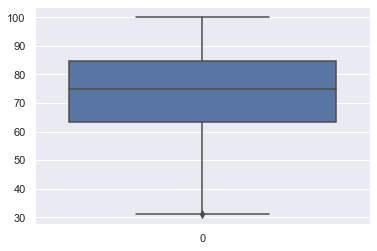

In [46]:
sns.boxplot(data=ccpp1['r_humidity'])

### Observation:
   >>* But here still we can see some outliers below 30

In [47]:
Q1 = ccpp1.r_humidity.quantile(0.25)
Q3 = ccpp1.r_humidity.quantile(0.75)
Q1,Q3

(63.3125, 84.8475)

In [48]:
IQR = Q3-Q1
print(IQR)

21.534999999999997


In [49]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(31.010000000000005, 117.14999999999999)

In [50]:
ccpp1[(ccpp1.r_humidity<lower_limit)|(ccpp1.r_humidity>upper_limit)]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
5610,29.85,68.24,1007.01,30.99,433.43


In [51]:
ccpp1 = ccpp1[(ccpp1.r_humidity>lower_limit)&(ccpp1.r_humidity<upper_limit)]

<AxesSubplot:>

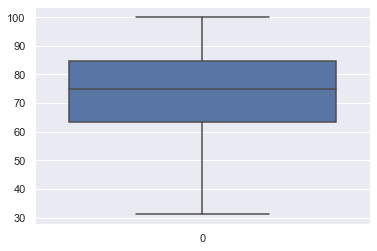

In [52]:
sns.boxplot(data=ccpp1['r_humidity'])

In [53]:
ccpp1

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


## Observation:
   * Original Dataset contains - Observations = **9568**
   * After Removal of Duplicates(41) - Observations = **9527**
   * After Removal of outliers - Observations = **9418**

#### ===============================================================================================

## 4. Assumptions of Linear Regression
The Linear Regression model is based on several assumptions which are as follows:-

## 1. Normality Test
* Skweness = 0
* Kurtosis = 0

### temperature

Text(0.5, 1.0, 'Normality Test - Temperature')

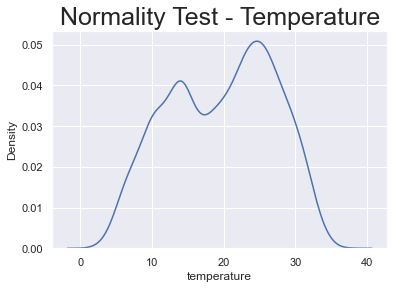

In [54]:
sns.distplot(a=ccpp1['temperature'],hist=False)
plt.title('Normality Test - Temperature',size=25)

In [55]:
ccpp1.temperature.skew()

-0.15407488954859153

In [56]:
ccpp1.temperature.kurtosis()

-1.01983658909601

### exhaust_vacuum

Text(0.5, 1.0, 'Normality Test - exhaust_vacuum')

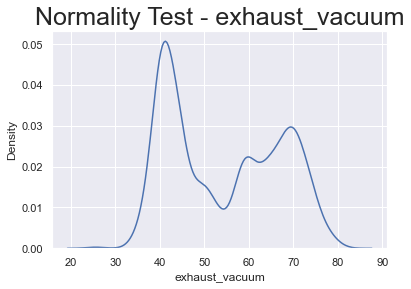

In [57]:
sns.distplot(a=ccpp1['exhaust_vacuum'],hist=False)
plt.title('Normality Test - exhaust_vacuum',size=25)

In [58]:
ccpp1.exhaust_vacuum.skew()

0.1794220882950822

In [59]:
ccpp1.exhaust_vacuum.kurtosis()

-1.445425279530986

### ambient_pressure

Text(0.5, 1.0, 'Normality Test - amb_pressure')

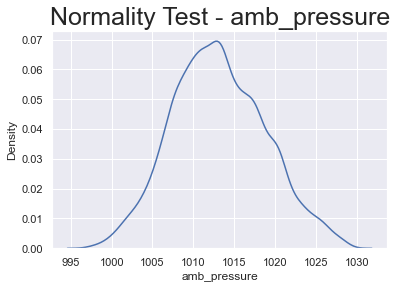

In [60]:
sns.distplot(a=ccpp1['amb_pressure'],hist=False)
plt.title('Normality Test - amb_pressure',size=25)

In [61]:
ccpp1.amb_pressure.skew()

0.16589542379343342

In [62]:
ccpp1.amb_pressure.kurtosis()

-0.3025874381825897

### Relative_humidity

Text(0.5, 1.0, 'Normality Test - r_humidity')

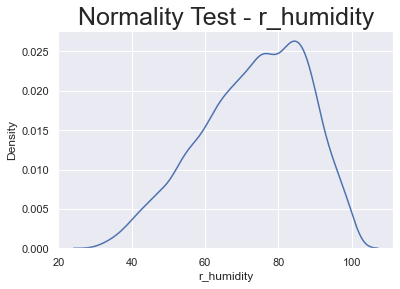

In [63]:
sns.distplot(a=ccpp1['r_humidity'],hist=False)
plt.title('Normality Test - r_humidity',size=25)

In [64]:
ccpp1.r_humidity.skew()

-0.4145111029300346

In [65]:
ccpp1.r_humidity.kurtosis()

-0.5012806961206122

### Observation:
   Normality Test Failed due to skewness and kurtosis is not exactly equal to Zero, but its under acceptable range

## 2. Linearity Test

Text(0.5, 1.0, 'Linearity Test - Temperature')

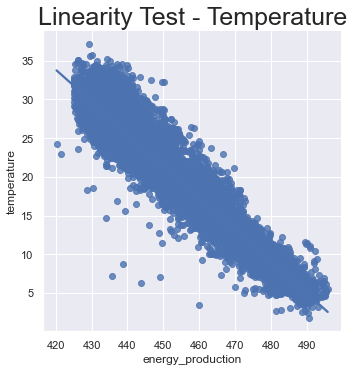

In [66]:
sns.lmplot(x='energy_production',y='temperature',data=ccpp1)
plt.title('Linearity Test - Temperature',size=25)

Text(0.5, 1.0, 'Linearity Test - Exhaust_vacuum')

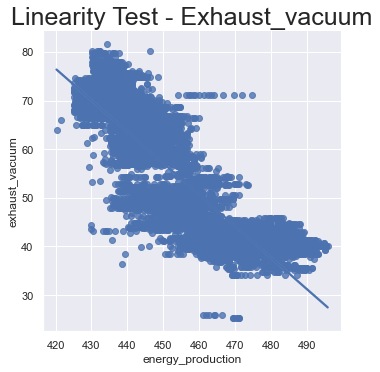

In [67]:
sns.lmplot(x='energy_production',y='exhaust_vacuum',data=ccpp1)
plt.title('Linearity Test - Exhaust_vacuum',size=25)

Text(0.5, 1.0, 'Linearity Test - amb_pressure')

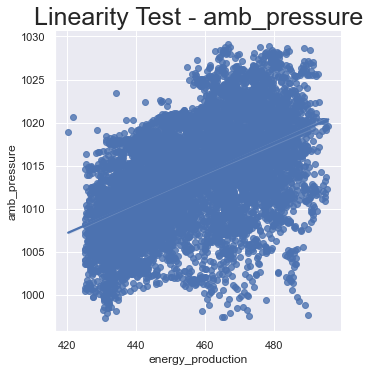

In [68]:
sns.lmplot(x='energy_production',y='amb_pressure',data=ccpp1)
plt.title('Linearity Test - amb_pressure',size=25)

Text(0.5, 1.0, 'Linearity Test - r_humidity')

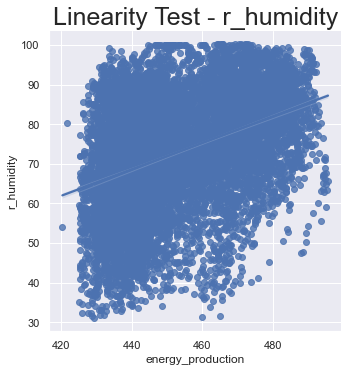

In [69]:
sns.lmplot(x='energy_production',y='r_humidity',data=ccpp1)
plt.title('Linearity Test - r_humidity',size=25)

## Observation:
   So our data is not following the linearity, there are outliers present in our data

### 3. No Auto Correlation:
   There is a correlation coefficient between temperature and exhaust_vacuum

### 4 . Autoregression test:
   There are no time based inputs, so it is passed

### 5. Homoscedasticity check || Residual Mean Check:
   Will be performed after model building

### Homoscedasticity check:
   Should have same varaince (For homoscedasticity check all your input features must be in a similar scale) We have to pickup each and every feature and plot with respect to its error(error=y-y_pred)

### Residual Mean Check:
 All the points should fall on the best fit line (There should be Zero Error)

#### ========================================================================================================

## Model Building

In [70]:
import statsmodels.formula.api as smf

In [71]:
model = smf.ols(formula='energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=ccpp1).fit()
model

In [72]:
model.params

Intercept         443.195167
temperature        -1.970523
exhaust_vacuum     -0.236359
amb_pressure        0.073345
r_humidity         -0.158030
dtype: float64

In [73]:
np.round(model.pvalues,4),np.round(model.tvalues,4)

(Intercept         0.0
 temperature       0.0
 exhaust_vacuum    0.0
 amb_pressure      0.0
 r_humidity        0.0
 dtype: float64,
 Intercept          43.2061
 temperature      -127.8277
 exhaust_vacuum    -32.2321
 amb_pressure        7.3627
 r_humidity        -37.4677
 dtype: float64)

In [74]:
#Finding R-Squared values                                                        
print('Rsquared value:',model.rsquared) , print('Rsquared adj value:',model.rsquared_adj)
#model accuracy is 92%

Rsquared value: 0.9277425155023922
Rsquared adj value: 0.9277118068391973


(None, None)

In [75]:
slr_exh=smf.ols(formula='energy_production~exhaust_vacuum', data=ccpp1).fit()
slr_exh.tvalues , slr_exh.pvalues 

(Intercept         1353.867332
 exhaust_vacuum    -170.221741
 dtype: float64,
 Intercept         0.0
 exhaust_vacuum    0.0
 dtype: float64)

In [76]:
slr_amb=smf.ols(formula='energy_production~amb_pressure', data=ccpp1).fit()
slr_amb.tvalues , slr_amb.pvalues 

(Intercept      -42.221286
 amb_pressure    59.267078
 dtype: float64,
 Intercept       0.0
 amb_pressure    0.0
 dtype: float64)

In [77]:
slr_r_hum=smf.ols(formula='energy_production~r_humidity', data=ccpp1).fit()
slr_r_hum.tvalues , slr_r_hum.pvalues 

(Intercept     507.958244
 r_humidity     41.022745
 dtype: float64,
 Intercept     0.0
 r_humidity    0.0
 dtype: float64)

In [78]:
slr_tmp=smf.ols(formula='energy_production~temperature', data=ccpp1).fit()
slr_tmp.tvalues , slr_tmp.pvalues 

(Intercept      3113.947802
 temperature    -286.767041
 dtype: float64,
 Intercept      0.0
 temperature    0.0
 dtype: float64)

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.021e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:53:55   Log-Likelihood:                -27668.
No. Observations:                9417   AIC:                         5.535e+04
Df Residuals:                    9412   BIC:                         5.538e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        443.1952     10.258     43.206      0.000     423.088     463.302
temperature       -1.9705      0.015   -127.828      0.000      -2.001      -1.940
exhaust_vacuum    -0.2364      0.007    -32.232      0.000      -0.251      -0.222
amb_pressure       0.0733      0.010      7.363      0.000       0.054       0.093
r_humidity        -0.1580      0.004    -37.468      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      885.871   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4066.097
Skew:                          -0.357   Prob(JB):                         0.00
Kurtosis:                       6.139   Cond. No.                     2.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
model1 = smf.ols(formula='energy_production~temperature+amb_pressure+r_humidity',data=ccpp1).fit()
model1

In [81]:
print('Rsquared value:',model1.rsquared) , print('Rsquared adj value:',model1.rsquared_adj)

Rsquared value: 0.9197666578397814
Rsquared adj value: 0.9197410868181644


(None, None)

In [82]:
model2 = smf.ols(formula='energy_production~exhaust_vacuum+amb_pressure+r_humidity',data=ccpp1).fit()
model2

In [83]:
print('Rsquared value:',model2.rsquared) , print('Rsquared adj value:',model2.rsquared_adj)

Rsquared value: 0.8022983016408555
Rsquared adj value: 0.8022352924944539


(None, None)

### Inference:
   * Statsmodels gives accuracy of 92%

#### =============================================================================================

### Splitting the data into Independent(X) & Dependent Variables(Y)

In [84]:
X=ccpp1.iloc[:,0:4]
X

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [85]:
Y=ccpp1.energy_production
Y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9417, dtype: float64

### Standardization

In [86]:
from sklearn.preprocessing import StandardScaler
x_scale= StandardScaler().fit_transform(X)
x_scale
type(x_scale)

numpy.ndarray

## AFTER REMOVING OUTLIERS

## Model Building

### Splitting the data into train and test parts

In [87]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RepeatedKFold
x_train,x_test,y_train,y_test= train_test_split(x_scale,Y,test_size=0.2,random_state=10)

# Models

In [222]:
x_test.shape

(1884, 4)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [89]:
# selecting best models
model_selc = [LinearRegression(),
             DecisionTreeRegressor(),
             RandomForestRegressor(n_estimators = 10),
             GradientBoostingRegressor(),
             SVR(kernel='poly'),
             xgb.XGBRegressor(),
             Ridge(alpha=4),
             Lasso(alpha=4),
             KNeighborsRegressor(),
             AdaBoostRegressor()]

In [91]:
kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state= None)
cv_results = []
cv_results_mean =[]
for ele in model_selc:
    cross_results = cross_val_score(ele,x_train,y_train, cv=kfold, scoring ='r2')
   
    cv_results.append(cross_results)
   
    cv_results_mean.append(cross_results.mean())
    print("\n MODEL: ",ele,"\nMEAN R2:",cross_results.mean())


 MODEL:  LinearRegression() 
MEAN R2: 0.928225623829581

 MODEL:  DecisionTreeRegressor() 
MEAN R2: 0.926383457778469

 MODEL:  RandomForestRegressor(n_estimators=10) 
MEAN R2: 0.9563916469550574

 MODEL:  GradientBoostingRegressor() 
MEAN R2: 0.9482609116778087

 MODEL:  SVR(kernel='poly') 
MEAN R2: 0.7814462102297091

 MODEL:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_s

### output of best models

## Model Fitting

#### 1) LINEAR REGRESSION.

In [92]:
# regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

#for predict the test values
y_predict_li=reg.predict(x_test)
y_predict_li

array([477.73729378, 449.23936545, 426.77925958, ..., 483.78700487,
       433.28498274, 455.03207448])

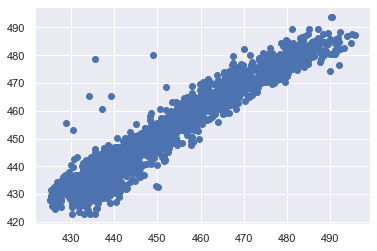

In [93]:
#plot on prdtion
plt.scatter(y_test, y_predict_li)
plt.show()

(419.35384974999386,
 499.72715803772036,
 419.35384974999386,
 499.72715803772036)

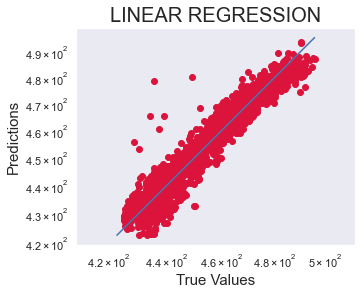

In [94]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_li, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_li), max(y_test))
p2 = min(min(y_predict_li), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('LINEAR REGRESSION',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [95]:
#testing Accuracy
test_data_model_score=reg.score(x_test,y_test)
print ('Accuracy of test data: ',test_data_model_score)
#score of test data  0.9266343475459896

#training Accuracy
train_data_model_score=reg.score(x_train,y_train)
print ('Accuracy of train data: ',train_data_model_score)
#score of train data 0.9292095855394127

Accuracy of test data:  0.9250970525865723
Accuracy of train data:  0.9284079315510405


### Mean Absolute error

In [96]:
from sklearn.metrics import mean_absolute_error
mae1=mean_absolute_error(y_test, y_predict_li)
print("Mean Absolute Error:",round(mae1,4))
#3.6477061540109905

Mean Absolute Error: 3.6477


### Mean squared error

In [97]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test, y_predict_li)
print("Mean Squared Error:",round(mse1,4))
# 22.47049555767316

Mean Squared Error: 22.4705


### Root Mean squared error

In [98]:
from sklearn.metrics import mean_squared_error
rmse1=np.sqrt(mean_squared_error(y_test, y_predict_li))
print("Root Mean Squared:",round(rmse1,4))
#4.740305428732748

Root Mean Squared: 4.7403


### Root mean squared log error

In [99]:
from sklearn.metrics import mean_squared_log_error
rmsle1=np.sqrt(mean_squared_log_error(y_test, y_predict_li))
print("Root Mean Squared log Error:",round(rmsle1,4))
#0.010457731810532257

Root Mean Squared log Error: 0.0105


### R-Squared

In [100]:
from sklearn.metrics import r2_score
r2score1= r2_score(y_predict_li,y_test)*100
print("Linear Regression R-Squared :",round(r2score1,4))
#92.01476010770673

Linear Regression R-Squared : 92.0148


##### ===============================================================================================================

### 2)DECISION TREE REGRESSOR.

In [101]:
DTR = DecisionTreeRegressor(random_state = 0) 
DTR.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [102]:
#for predict the test values
y_predict_dt=DTR.predict(x_test)
y_predict_dt

array([477.76, 442.57, 425.16, ..., 477.78, 434.48, 459.06])

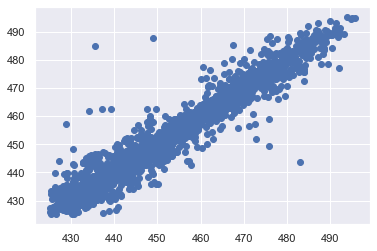

In [103]:
#plot on prdtion
plt.scatter(y_test, y_predict_dt)
plt.show()

(421.8546232350237, 499.5856913545911, 421.8546232350237, 499.5856913545911)

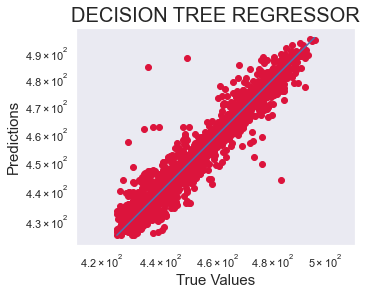

In [104]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_dt, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_dt), max(y_test))
p2 = min(min(y_predict_dt), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('DECISION TREE REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [105]:
#testing Accuracy
test_data_model_score=DTR.score(x_test,y_test)
print ('Accuarcy of test data',round(test_data_model_score,4))
#score of test data  0.9266432610903093

#Training Accuarcy
train_data_model_score=DTR.score(x_train,y_train)
print ('Accuracy of train data',train_data_model_score)
#score of train data 1.0

Accuarcy of test data 0.9263
Accuracy of train data 1.0


### Mean Absolute Error

In [106]:
from sklearn.metrics import mean_absolute_error
mae2=mean_absolute_error(y_test, y_predict_dt)
print("Mean Absolute Error:",round(mae2,4))
# 3.1191135881104026

Mean Absolute Error: 3.1314


### Mean squared error

In [107]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(y_test, y_predict_dt)
print("Mean Squared Error:",round(mse2,4))
#22.00664102972398

Mean Squared Error: 22.1067


### Root mean squared error

In [108]:
from sklearn.metrics import mean_squared_error
rmse2=np.sqrt(mean_squared_error(y_test, y_predict_dt))
print("Root Mean Squared Error:",round(rmse2,4))
#4.691123642553453

Root Mean Squared Error: 4.7018


### Root mean squared  log error

In [109]:
from sklearn.metrics import mean_squared_log_error
rmsle2=np.sqrt(mean_squared_log_error(y_test, y_predict_dt))
print("Root Mean Squared log Error:",round(rmsle2,4))
#0.010315749147145163

Root Mean Squared log Error: 0.0103


### R-Squared

In [110]:
from sklearn.metrics import r2_score
r2score2= r2_score(y_predict_dt,y_test)*100
print("Decision Tree Regressor R-Squared:",round(r2score2,4))
#92.6073753875723

Decision Tree Regressor R-Squared: 92.5721


#### =============================================================================================================

### 3)Randomforest regressor

In [111]:
RFR= RandomForestRegressor(n_estimators =50, random_state = 0)
RFR.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [112]:
#for predict the test values
y_predict_rfr=RFR.predict(x_test)
y_predict_rfr

array([476.667 , 444.5358, 429.449 , ..., 482.9574, 431.6932, 457.7778])

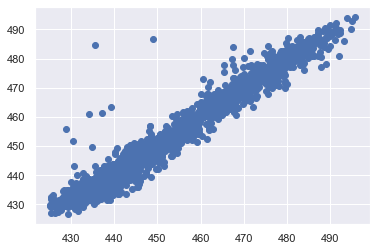

In [113]:
#plot on prdtion
plt.scatter(y_test, y_predict_rfr)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

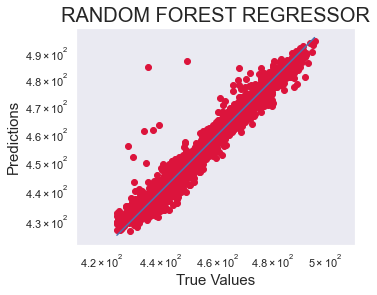

In [114]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_rfr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_rfr), max(y_test))
p2 = min(min(y_predict_rfr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('RANDOM FOREST REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [115]:
#testing Accuracy
test_data_model_score=RFR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9643776538798704

#Training Accuracy
train_data_model_score=RFR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.9942791162212218

Accuracy of test data 0.9568
Accuracy of train data 0.9947


### Mean Absolute Error

In [116]:
from sklearn.metrics import mean_absolute_error
mae3=mean_absolute_error(y_test, y_predict_rfr)
print("Mean Absolute Error:",round(mae3,4))# 2.3888158447009427

Mean Absolute Error: 2.379


### Mean squared error

In [117]:
from sklearn.metrics import mean_squared_error
mse3=mean_squared_error(y_test, y_predict_rfr)
print("Mean Squared Error:",round(mse3,4))# 10.619288183315835

Mean Squared Error: 12.9512


### Root mean squared error

In [118]:
from sklearn.metrics import mean_squared_error
rmse3=np.sqrt(mean_squared_error(y_test, y_predict_rfr))
print("Root Mean Squared Error:",round(rmse3,4))# 3.2587249321346277

Root Mean Squared Error: 3.5988


### Root mean squared  log error

In [119]:
from sklearn.metrics import mean_squared_log_error
rmsle3=np.sqrt(mean_squared_log_error(y_test, y_predict_rfr))
print("Root Mean Squared Log Error:",round(rmsle3,4))#    0.007170585348316128

Root Mean Squared Log Error: 0.0079


### R-Squared

In [120]:
from sklearn.metrics import r2_score
r2score3= r2_score(y_predict_rfr,y_test)*100
print("Random Forest Regressor R-Squared:",round(r2score3,4))#96.26434133875483

Random Forest Regressor R-Squared: 95.5156


#### ====================================================================================================

### 4)GradientBoostingRegressor.

In [121]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100) # lr = 0.1, est = 100
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [122]:
#for predict the test values
y_predict_gbr=GBR.predict(x_test)
y_predict_gbr

array([476.68837124, 444.62344598, 431.32780899, ..., 485.93785762,
       432.35107973, 457.02934987])

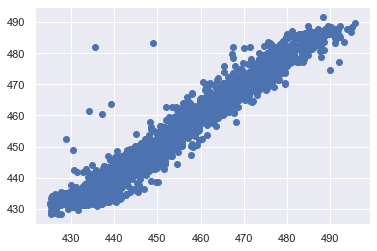

In [123]:
#plot on prdtion
plt.scatter(y_test, y_predict_gbr)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

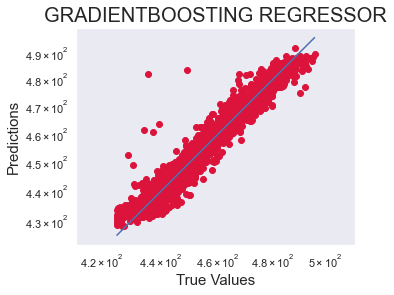

In [124]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_gbr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_gbr), max(y_test))
p2 = min(min(y_predict_gbr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('GRADIENTBOOSTING REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [125]:
#testing Accuarcy
test_data_model_score=GBR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9526412792412793

#Training Accuracy
train_data_model_score=GBR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.952306441895972

Accuracy of test data 0.9448
Accuracy of train data 0.9535


### Mean Absolute Error

In [126]:
from sklearn.metrics import mean_absolute_error
mae4=mean_absolute_error(y_test, y_predict_gbr)
print("Mean Absolute error:",round(mae4,4))#2.376204352441617

Mean Absolute error: 2.9854


### Mean squared error

In [127]:
from sklearn.metrics import mean_squared_error
mse4=mean_squared_error(y_test, y_predict_gbr)
print("Mean Squared error:",round(mse4,4))
#12.939978143757953

Mean Squared error: 16.5523


### Root mean squared error

In [128]:
from sklearn.metrics import mean_squared_error
rmse4=np.sqrt(mean_squared_error(y_test, y_predict_gbr))
print("Root Mean Squared error:",round(rmse4,4))
# 3.757391298014509

Root Mean Squared error: 4.0685


### Root mean squared  log error

In [129]:
from sklearn.metrics import mean_squared_log_error
rmsle4=np.sqrt(mean_squared_log_error(y_test, y_predict_gbr))
print("Root Mean Squared log error:",round(rmsle4,4))#   #0.007894554589656122

Root Mean Squared log error: 0.0089


### R-Squared

In [130]:
from sklearn.metrics import r2_score
r2score4= r2_score(y_predict_gbr,y_test)*100
print("Gradient Boosting Regressor:",round(r2score4,4))#95.5195589356916

Gradient Boosting Regressor: 94.147


#### =============================================================================================================

### 5)SUPPORT VECTOR REGRESSOR

In [131]:
SVR=SVR(kernel='linear')
SVR.fit(x_train,y_train)

SVR(kernel='linear')

In [132]:
#for predict the test values
y_predict_svr=SVR.predict(x_test)
y_predict_svr

array([477.8637649 , 449.07301746, 426.16393402, ..., 484.31405749,
       432.88860377, 455.11962162])

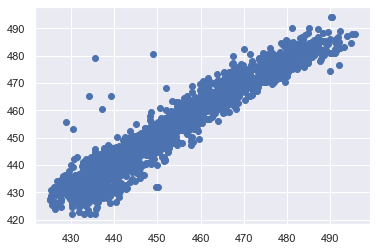

In [133]:
#plot on prdtion
plt.scatter(y_test, y_predict_svr)
plt.show()

(418.5352164089279, 499.77365953128907, 418.5352164089279, 499.77365953128907)

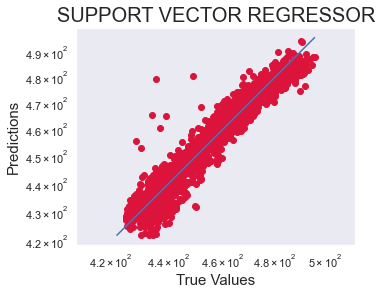

In [134]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_svr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_svr), max(y_test))
p2 = min(min(y_predict_svr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('SUPPORT VECTOR REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [135]:
#testing Accuracy
test_data_model_score=SVR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9323981412429594

#Training Accuarcy
train_data_model_score=SVR.score(x_train,y_train)
print ('accuracy of train data',round(train_data_model_score,4))
#score of test data 0.9268129221113746

Accuracy of test data 0.9246
accuracy of train data 0.928


### Mean Absolute Error

In [136]:
from sklearn.metrics import mean_absolute_error
mae5=mean_absolute_error(y_test, y_predict_svr)
print("Mean Absolute Error:",round(mae5,4))#3.638035279785594

Mean Absolute Error: 3.6354


### Mean squared error

In [137]:
from sklearn.metrics import mean_squared_error
mse5=mean_squared_error(y_test, y_predict_svr)
print("Mean Squared Error:",round(mse5,4))#22.63936631575012

Mean Squared Error: 22.6263


### Root mean squared error

In [138]:
from sklearn.metrics import mean_squared_error
rmse5=np.sqrt(mean_squared_error(y_test, y_predict_svr))
print("Root Mean Squared Error:",round(rmse5,4))#4.7580843115428415

Root Mean Squared Error: 4.7567


### Root mean squared  log error

In [139]:
from sklearn.metrics import mean_squared_log_error
rmsle5=np.sqrt(mean_squared_log_error(y_test, y_predict_svr))
print("Root Mean Squared log Error:",round(rmsle5,4))#0.010509241567198744

Root Mean Squared log Error: 0.0105


### R-Squared

In [140]:
from sklearn.metrics import r2_score
r2score5= r2_score(y_predict_svr,y_test)*100
print("Support Vector Regressor R-Squared:",round(r2score5,4))# 92.21165393596998

Support Vector Regressor R-Squared: 92.2449


#### ===========================================================================================================

### 6)XGBOOST

In [141]:
XGB=xgb.XGBRegressor(n_estimators=100,eta=0.001,gamma=10,learning_rate=0.5)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.001,
             eval_metric=None, gamma=10, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [142]:
#for predict the test values
y_predict_xgb=XGB.predict(x_test)
y_predict_xgb

array([475.97754, 444.32382, 431.63113, ..., 484.40372, 431.6131 ,
       457.07477], dtype=float32)

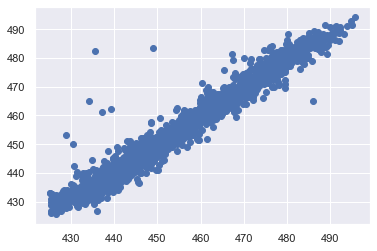

In [143]:
#plot on prdtion
plt.scatter(y_test, y_predict_xgb)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

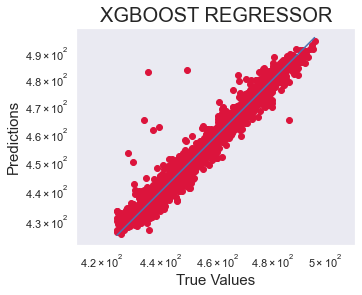

In [144]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_xgb, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_xgb), max(y_test))
p2 = min(min(y_predict_xgb), min(y_test))
plt.title('XGBOOST REGRESSOR',fontsize=20)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [145]:
#testing Accuaracy
test_data_model_score=XGB.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9665988364354935

#Training Accuaracy
train_data_model_score=XGB.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.9859995156739711

Accuracy of test data 0.9589
Accuracy of train data 0.9835


### Mean Absolute Error

In [146]:
from sklearn.metrics import mean_absolute_error
mae6=mean_absolute_error(y_test, y_predict_xgb)
print("Mean Absolute Error:",round(mae6,4))#3.638035279785594

Mean Absolute Error: 2.3716


### Mean squared error

In [147]:
from sklearn.metrics import mean_squared_error
mse6=mean_squared_error(y_test, y_predict_xgb)
print("Mean Squared Error:",round(mse6,4))#22.6263

Mean Squared Error: 12.3414


### Root mean squared error

In [148]:
from sklearn.metrics import mean_squared_error
rmse6=np.sqrt(mean_squared_error(y_test, y_predict_xgb))
print("Root Mean Squared Error:",round(rmse6,4))#3.155493151193729

Root Mean Squared Error: 3.513


### Root mean squared  log error

In [149]:
from sklearn.metrics import mean_squared_log_error
rmsle6=np.sqrt(mean_squared_log_error(y_test, y_predict_xgb))
print("Root Mean Squared log Error:",round(rmsle6,4))#0.007718071208356141

Root Mean Squared log Error: 0.0077


### R-Squared

In [150]:
from sklearn.metrics import r2_score
r2score6= r2_score(y_predict_xgb,y_test)*100
print("XGBoost R-Squaredr2:",round(r2score6,4))#92.2449

XGBoost R-Squaredr2: 95.7514


#### ==============================================================================

### 7)Ridge REGRESSOR

In [151]:
RG= Ridge(alpha=0.01) # lambda
RG.fit(x_train,y_train)

Ridge(alpha=0.01)

In [152]:
#for predict the test values
y_predict_rg=RG.predict(x_test)
y_predict_rg

array([477.73726778, 449.23943033, 426.7793135 , ..., 483.78689511,
       433.28497665, 455.03214846])

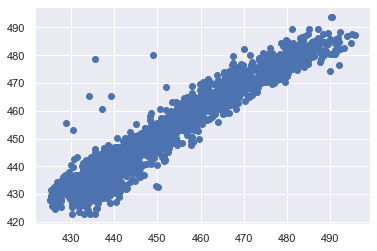

In [153]:
#plot on predtion
plt.scatter(y_test, y_predict_rg)
plt.show()

(419.35388329227334,
 499.72715613434013,
 419.35388329227334,
 499.72715613434013)

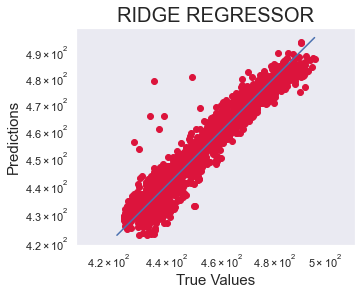

In [154]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_rg, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_rg), max(y_test))
p2 = min(min(y_predict_rg), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("RIDGE REGRESSOR",fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [155]:
#Testing Accuracy
test_data_model_score=RG.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9327180350820679

#Training Accuracy
train_data_model_score=RG.score(x_train,y_train)
print ('Accuarcy of train data',round(train_data_model_score,4))
#score of train data 0.9273093296060364

Accuracy of test data 0.9251
Accuarcy of train data 0.9284


### Mean Absolute Error

In [156]:
from sklearn.metrics import mean_absolute_error
mae7=mean_absolute_error(y_test, y_predict_rg)
print("Mean Absolute Error",round(mae7,4))#3.6477

Mean Absolute Error 3.6477


### Mean Squared Error

In [157]:
from sklearn.metrics import mean_squared_error
mse7=mean_squared_error(y_test, y_predict_rg)
print("Mean Squared Error",round(mse7,4))# 22.470495273661946

Mean Squared Error 22.4705


### Root mean squared error

In [158]:
from sklearn.metrics import mean_squared_error
rmse7=np.sqrt(mean_squared_error(y_test, y_predict_rg))
print("Root Mean Squared Error",round(rmse7,4))#4.7403

Root Mean Squared Error 4.7403


### Root mean squared  log error

In [159]:
from sklearn.metrics import mean_squared_log_error
rmsle7=np.sqrt(mean_squared_log_error(y_test, y_predict_rg))
print("Root Mean Squared log Error",round(rmsle7,4))#0.010457731721050396

Root Mean Squared log Error 0.0105


### R-Squared

In [160]:
from sklearn.metrics import r2_score
r2score7= r2_score(y_predict_rg,y_test)*100
print("Ridge Regressor R-Squared",round(r2score7,4))#92.0147

Ridge Regressor R-Squared 92.0147


#### =============================================================================================================4

### 8) LASSO REGRESSOR

In [161]:
LSR = Lasso(alpha=4)
LSR.fit(x_train,y_train)

Lasso(alpha=4)

In [162]:
#for predict the test values
y_predict_lsr=LSR.predict(x_test)
y_predict_lsr

array([469.9691299 , 451.4624633 , 434.93398885, ..., 476.76131161,
       440.3141127 , 457.11508812])

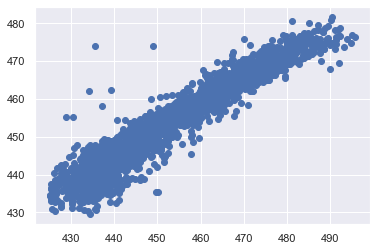

In [163]:
#plot on prdtion
plt.scatter(y_test, y_predict_lsr)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

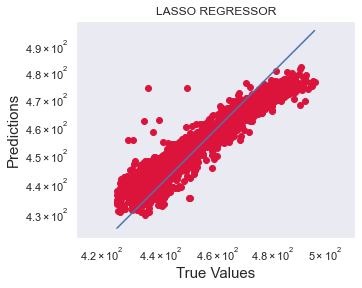

In [164]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_lsr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_lsr), max(y_test))
p2 = min(min(y_predict_lsr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('LASSO REGRESSOR')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [165]:
#testing Accuracy
test_data_model_score=LSR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.8507

#Training Accuracy
train_data_model_score=LSR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.8542

Accuracy of test data 0.8507
Accuracy of train data 0.8542


### Mean Absolute Error

In [166]:
from sklearn.metrics import mean_absolute_error
mae8=mean_absolute_error(y_test, y_predict_lsr)
print("Mean Absolute Error:",round(mae8,4))

Mean Absolute Error: 5.4023


### Mean squared error

In [167]:
from sklearn.metrics import mean_squared_error
mse8=mean_squared_error(y_test, y_predict_lsr)
print("Mean squared Error:",round(mse8,4))

Mean squared Error: 44.7803


### Root mean squared error

In [168]:
from sklearn.metrics import mean_squared_error
rmse8=np.sqrt(mean_squared_error(y_test, y_predict_lsr))
print("Root Mean squared Error:",round(rmse8,4))

Root Mean squared Error: 6.6918


### Root mean squared  log error

In [169]:
from sklearn.metrics import mean_squared_log_error
rmsle8=np.sqrt(mean_squared_log_error(y_test, y_predict_lsr))
print("Root Mean squared log Error:",round(rmsle8,4))

Root Mean squared log Error: 0.0146


### R-Squared

In [170]:
from sklearn.metrics import r2_score
r2score8= r2_score(y_predict_lsr,y_test)*100
print("Lasso regressor R-Squared:",round(r2score8,4))

Lasso regressor R-Squared: 70.6815


#### ========================================================================================================

### 9)KNN Regressor

In [171]:
knn = KNeighborsRegressor(n_neighbors=5, p=2) # k =5 # p=2 --> Eucledian distance
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [172]:
#for predict the test values
y_predict_knn=knn.predict(x_test)
y_predict_knn

array([475.332, 445.174, 431.074, ..., 483.008, 432.826, 459.672])

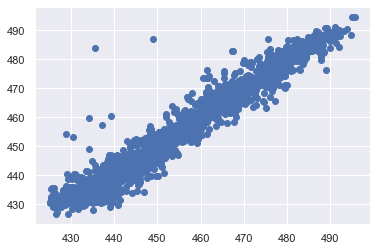

In [173]:
#plot on prdtion
plt.scatter(y_test, y_predict_knn)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

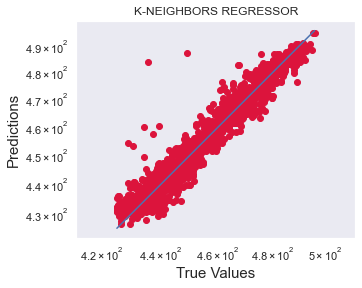

In [174]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_knn, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_knn), max(y_test))
p2 = min(min(y_predict_knn), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('K-NEIGHBORS REGRESSOR')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [175]:
#testing score
test_data_model_score=knn.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data  0.9520063526324694

train_data_model_score=knn.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.9638290944489041

Accuracy of test data 0.946
Accuracy of train data 0.9688


### Mean Absolute Error

In [176]:
# mean_absolute_error
mae9=mean_absolute_error(y_test, y_predict_knn)
print("Mean Absolute error:",round(mae9,4))
#  2.8151573976914994

Mean Absolute error: 2.7687


### Mean squared error

In [177]:

mse9=mean_squared_error(y_test, y_predict_knn)
print("Mean Squared error:",round(mse9,4))
# 14.30726574396642

Mean Squared error: 16.1979


### Root mean squared error

In [178]:
#for root mean squared error
rmse9=np.sqrt(mean_squared_error(y_test, y_predict_knn))
print("Root Mean Squared error:",round(rmse9,4))
#3.7824946455965303

Root Mean Squared error: 4.0247


### Root mean squared  log error

In [179]:
#root mean squared  log error
rmsle9=np.sqrt(mean_squared_log_error(y_test, y_predict_knn))
print("Root Mean Squared log error:",round(rmsle9,4))
#0.008337608169687899

Root Mean Squared log error: 0.0089


### R-Squared

In [180]:
#r2score
r2score9= r2_score(y_predict_knn,y_test)*100
print("K-Neighbors R-Squared:",round(r2score9,4))#94.9918734120857

K-Neighbors R-Squared: 94.43


#### ================================================================================================================

### 10) ADA BOOST REGRESSOR

In [181]:
AB = AdaBoostRegressor(base_estimator=DTR,n_estimators=100)
AB.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                  n_estimators=100)

In [182]:
#for predict the test values
y_predict_ab=knn.predict(x_test)
y_predict_ab

array([475.332, 445.174, 431.074, ..., 483.008, 432.826, 459.672])

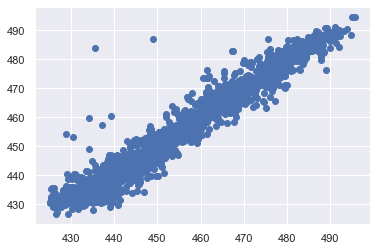

In [183]:
#plot on prdtion
plt.scatter(y_test, y_predict_ab)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

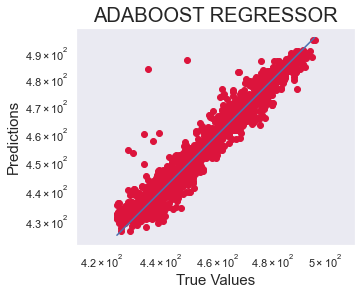

In [184]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_ab, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_ab), max(y_test))
p2 = min(min(y_predict_ab), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('ADABOOST REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [185]:
#testing score
test_data_model_score=AB.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data  0.9641628433325322

train_data_model_score=AB.score(x_train,y_train)
print ('Accuracy of test data',round(train_data_model_score,4))
#score of train data score of test data 0.9999302115876435

Accuracy of test data 0.9588
Accuracy of test data 0.9999


### Mean absolute error

In [186]:
# mean_absolute_error
mae10=mean_absolute_error(y_test, y_predict_ab)
print("Mean Absolute Error:",round(mae10,4))
#  2.8151573976914994

Mean Absolute Error: 2.7687


### Mean Squared Error

In [187]:
#for mean squared error
mse10=mean_squared_error(y_test, y_predict_ab)
print("Mean squared Error:",round(mse10,4))
# 14.30726574396642

Mean squared Error: 16.1979


### Root Mean Squared Error

In [188]:
#for root mean squared error
rmse10=np.sqrt(mean_squared_error(y_test, y_predict_ab))
print("Root Mean squared Error:",round(rmse10,4))

Root Mean squared Error: 4.0247


### Root Mean Squared Log Error

In [189]:
#root mean squared  log error
rmsle10=np.sqrt(mean_squared_log_error(y_test, y_predict_ab))
print("Root Mean squared log Error:",round(rmsle10,4))

Root Mean squared log Error: 0.0089


### R-Squared

In [190]:
#r2score
r2score10= r2_score(y_predict_ab,y_test)*100
print("AdaBoost Regerssor R-Squared:",round(r2score10,4))

AdaBoost Regerssor R-Squared: 94.43


#### ===========================================================================================

### 11)Neural Networks

In [191]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=4,  activation='relu')) #input layer
model.add(Dense(1, activation='relu')) #output layer

In [192]:
# Compile model
model.compile(loss='msle', optimizer='adam', metrics=['msle'])

# loss --> Regression --> mean square error
# loss --> multi class --> categorical_cross entropy

In [193]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=150)

# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#output:loss: 1.2283e-04 - msle: 1.2283e-04
#msle: 0.01%

Epoch 1/500
43/43 [==============================] - 1s 9ms/step - loss: 1.5739 - msle: 1.5739 - val_loss: 0.8662 - val_msle: 0.8662
Epoch 2/500
43/43 [==============================] - 0s 2ms/step - loss: 0.6254 - msle: 0.6254 - val_loss: 0.4378 - val_msle: 0.4378
Epoch 3/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3402 - msle: 0.3402 - val_loss: 0.2552 - val_msle: 0.2552
Epoch 4/500
43/43 [==============================] - 0s 2ms/step - loss: 0.2038 - msle: 0.2038 - val_loss: 0.1573 - val_msle: 0.1573
Epoch 5/500
43/43 [==============================] - 0s 2ms/step - loss: 0.1273 - msle: 0.1273 - val_loss: 0.0997 - val_msle: 0.0997
Epoch 6/500
43/43 [==============================] - 0s 2ms/step - loss: 0.0813 - msle: 0.0813 - val_loss: 0.0642 - val_msle: 0.0642
Epoch 7/500
43/43 [==============================] - 0s 2ms/step - loss: 0.0525 - msle: 0.0525 - val_loss: 0.0416 - val_msle: 0.0416
Epoch 8/500
43/43 [==============================] - 0s 2ms/step - lo

43/43 [==============================] - 0s 2ms/step - loss: 2.9775e-04 - msle: 2.9775e-04 - val_loss: 3.0732e-04 - val_msle: 3.0732e-04
Epoch 112/500
43/43 [==============================] - 0s 2ms/step - loss: 2.9737e-04 - msle: 2.9737e-04 - val_loss: 3.0693e-04 - val_msle: 3.0693e-04
Epoch 113/500
43/43 [==============================] - 0s 2ms/step - loss: 2.9696e-04 - msle: 2.9696e-04 - val_loss: 3.0659e-04 - val_msle: 3.0659e-04
Epoch 114/500
43/43 [==============================] - 0s 2ms/step - loss: 2.9662e-04 - msle: 2.9662e-04 - val_loss: 3.0603e-04 - val_msle: 3.0603e-04
Epoch 115/500
43/43 [==============================] - 0s 2ms/step - loss: 2.9619e-04 - msle: 2.9619e-04 - val_loss: 3.0562e-04 - val_msle: 3.0562e-04
Epoch 116/500
43/43 [==============================] - 0s 2ms/step - loss: 2.9583e-04 - msle: 2.9583e-04 - val_loss: 3.0514e-04 - val_msle: 3.0514e-04
Epoch 117/500
43/43 [==============================] - 0s 2ms/step - loss: 2.9541e-04 - msle: 2.9541e-04 - v

43/43 [==============================] - 0s 2ms/step - loss: 2.1585e-04 - msle: 2.1585e-04 - val_loss: 2.1811e-04 - val_msle: 2.1811e-04
Epoch 220/500
43/43 [==============================] - 0s 2ms/step - loss: 2.1524e-04 - msle: 2.1524e-04 - val_loss: 2.1616e-04 - val_msle: 2.1616e-04
Epoch 221/500
43/43 [==============================] - 0s 2ms/step - loss: 2.1375e-04 - msle: 2.1375e-04 - val_loss: 2.1505e-04 - val_msle: 2.1505e-04
Epoch 222/500
43/43 [==============================] - 0s 2ms/step - loss: 2.1246e-04 - msle: 2.1246e-04 - val_loss: 2.1384e-04 - val_msle: 2.1384e-04
Epoch 223/500
43/43 [==============================] - 0s 2ms/step - loss: 2.1151e-04 - msle: 2.1151e-04 - val_loss: 2.1276e-04 - val_msle: 2.1276e-04
Epoch 224/500
43/43 [==============================] - 0s 2ms/step - loss: 2.1083e-04 - msle: 2.1083e-04 - val_loss: 2.1283e-04 - val_msle: 2.1283e-04
Epoch 225/500
43/43 [==============================] - 0s 2ms/step - loss: 2.1084e-04 - msle: 2.1084e-04 - v

43/43 [==============================] - 0s 2ms/step - loss: 1.2546e-04 - msle: 1.2546e-04 - val_loss: 1.2425e-04 - val_msle: 1.2425e-04
Epoch 328/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2315e-04 - msle: 1.2315e-04 - val_loss: 1.3070e-04 - val_msle: 1.3070e-04
Epoch 329/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2413e-04 - msle: 1.2413e-04 - val_loss: 1.2209e-04 - val_msle: 1.2209e-04
Epoch 330/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2314e-04 - msle: 1.2314e-04 - val_loss: 1.2260e-04 - val_msle: 1.2260e-04
Epoch 331/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2326e-04 - msle: 1.2326e-04 - val_loss: 1.2514e-04 - val_msle: 1.2514e-04
Epoch 332/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2298e-04 - msle: 1.2298e-04 - val_loss: 1.2397e-04 - val_msle: 1.2397e-04
Epoch 333/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2373e-04 - msle: 1.2373e-04 - v

43/43 [==============================] - 0s 2ms/step - loss: 1.2103e-04 - msle: 1.2103e-04 - val_loss: 1.3110e-04 - val_msle: 1.3110e-04
Epoch 436/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2260e-04 - msle: 1.2260e-04 - val_loss: 1.1961e-04 - val_msle: 1.1961e-04
Epoch 437/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2344e-04 - msle: 1.2344e-04 - val_loss: 1.2090e-04 - val_msle: 1.2090e-04
Epoch 438/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2131e-04 - msle: 1.2131e-04 - val_loss: 1.1958e-04 - val_msle: 1.1958e-04
Epoch 439/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2240e-04 - msle: 1.2240e-04 - val_loss: 1.2126e-04 - val_msle: 1.2126e-04
Epoch 440/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2289e-04 - msle: 1.2289e-04 - val_loss: 1.2481e-04 - val_msle: 1.2481e-04
Epoch 441/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2411e-04 - msle: 1.2411e-04 - v

In [194]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'msle', 'val_loss', 'val_msle'])

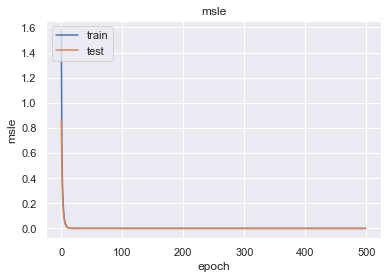

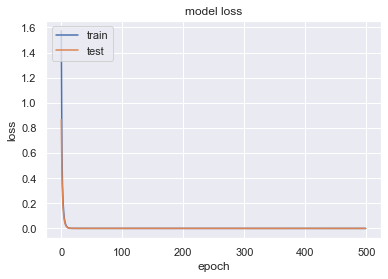

In [195]:
# summarize history for accuracy
plt.plot(history.history['msle'])
plt.plot(history.history['val_msle'])
plt.title('msle')
plt.ylabel('msle')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [196]:
#tabulating the values

data={'Model':pd.Series(['LinearRegression','DecisionTree_Regressor','RandomForest_Regressor','Gradientboosting_regressor','supportvector_regressor','XGB_Regressor','Ridge_regressor','Lasso_regressor','KNeighbors_Regressor','AdaBoost_Regressor']),'RMSE':pd.Series([rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9,rmse10]),
      'R2SCORES':pd.Series([r2score1,r2score2,r2score3,r2score4,r2score5,r2score6,r2score7,r2score8,r2score9,r2score10]),'MAE':pd.Series([mae1,mae2,mae3,mae4,mae5,mae6,mae7,mae8,mae9,mae10]),'RMSLE':pd.Series([rmsle1,rmsle2,rmsle3,rmsle4,rmsle5,rmsle6,rmsle7,rmsle8,rmsle9,rmsle10]),
      'MSE':pd.Series([mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10])}
pd.DataFrame(data)

,Model,RMSE,R2SCORES,MAE,RMSLE,MSE
0,LinearRegression,4.740305,92.014760,3.647706,0.010458,22.470496
1,DecisionTree_Regressor,4.701776,92.572051,3.131385,0.010340,22.106694
2,RandomForest_Regressor,3.598774,95.515563,2.378980,0.007898,12.951173
3,Gradientboosting_regressor,4.068452,94.147034,2.985379,0.008936,16.552301
4,supportvector_regressor,4.756711,92.244950,3.635397,0.010507,22.626297
5,XGB_Regressor,3.513038,95.751439,2.371584,0.007714,12.341438
6,Ridge_regressor,4.740304,92.014744,3.647707,0.010458,22.470482
7,Lasso_regressor,6.691811,70.681508,5.402325,0.014621,44.780330
8,KNeighbors_Regressor,4.024661,94.430003,2.768667,0.008856,16.197893
9,AdaBoost_Regressor,4.024661,94.430003,2.768667,0.008856,16.197893


In [197]:
pd.set_option("display.max.columns",None)
data

{'Model': 0              LinearRegression
 1        DecisionTree_Regressor
 2        RandomForest_Regressor
 3    Gradientboosting_regressor
 4       supportvector_regressor
 5                 XGB_Regressor
 6               Ridge_regressor
 7               Lasso_regressor
 8          KNeighbors_Regressor
 9            AdaBoost_Regressor
 dtype: object,
 'RMSE': 0    4.740305
 1    4.701776
 2    3.598774
 3    4.068452
 4    4.756711
 5    3.513038
 6    4.740304
 7    6.691811
 8    4.024661
 9    4.024661
 dtype: float64,
 'R2SCORES': 0    92.014760
 1    92.572051
 2    95.515563
 3    94.147034
 4    92.244950
 5    95.751439
 6    92.014744
 7    70.681508
 8    94.430003
 9    94.430003
 dtype: float64,
 'MAE': 0    3.647706
 1    3.131385
 2    2.378980
 3    2.985379
 4    3.635397
 5    2.371584
 6    3.647707
 7    5.402325
 8    2.768667
 9    2.768667
 dtype: float64,
 'RMSLE': 0    0.010458
 1    0.010340
 2    0.007898
 3    0.008936
 4    0.010507
 5    0.007714
 6    0.

### Tabulating All Model Performances after removing outliers and standardising the data

In [198]:
RESULTS=pd.DataFrame(data)
RESULTS
RESULTS.sort_values(['RMSE','R2SCORES'])

,Model,RMSE,R2SCORES,MAE,RMSLE,MSE
5,XGB_Regressor,3.513038,95.751439,2.371584,0.007714,12.341438
2,RandomForest_Regressor,3.598774,95.515563,2.378980,0.007898,12.951173
8,KNeighbors_Regressor,4.024661,94.430003,2.768667,0.008856,16.197893
9,AdaBoost_Regressor,4.024661,94.430003,2.768667,0.008856,16.197893
3,Gradientboosting_regressor,4.068452,94.147034,2.985379,0.008936,16.552301
1,DecisionTree_Regressor,4.701776,92.572051,3.131385,0.010340,22.106694
6,Ridge_regressor,4.740304,92.014744,3.647707,0.010458,22.470482
0,LinearRegression,4.740305,92.014760,3.647706,0.010458,22.470496
4,supportvector_regressor,4.756711,92.244950,3.635397,0.010507,22.626297
7,Lasso_regressor,6.691811,70.681508,5.402325,0.014621,44.780330


#### =================================================================================================

In [199]:
#To Dump a Pickle File

In [200]:
import pickle

In [201]:
from pickle import dump

In [202]:
with open("model_xgb.pkl",'wb') as f:
    pickle.dump(y_predict_xgb,f)

In [203]:
#To load a Pickle File

In [204]:
from pickle import load

In [205]:
loaded_model=load(open('model_xgb.pkl','rb'))
loaded_model

array([475.97754, 444.32382, 431.63113, ..., 484.40372, 431.6131 ,
       457.07477], dtype=float32)

### Min and Max Values of Independent Variables

In [206]:
min(ccpp1['r_humidity'])

31.15

In [207]:
max(ccpp1['r_humidity'])

100.16

In [208]:
min(ccpp1['amb_pressure'])

997.34

In [209]:
max(ccpp1['exhaust_vacuum'])

81.56

In [210]:
min(ccpp1['exhaust_vacuum'])

25.36

In [211]:
max(ccpp1['temperature'])

37.11

In [212]:
min(ccpp1['temperature'])

1.81

In [213]:
ccpp1.shape

(9417, 5)

# Deployment

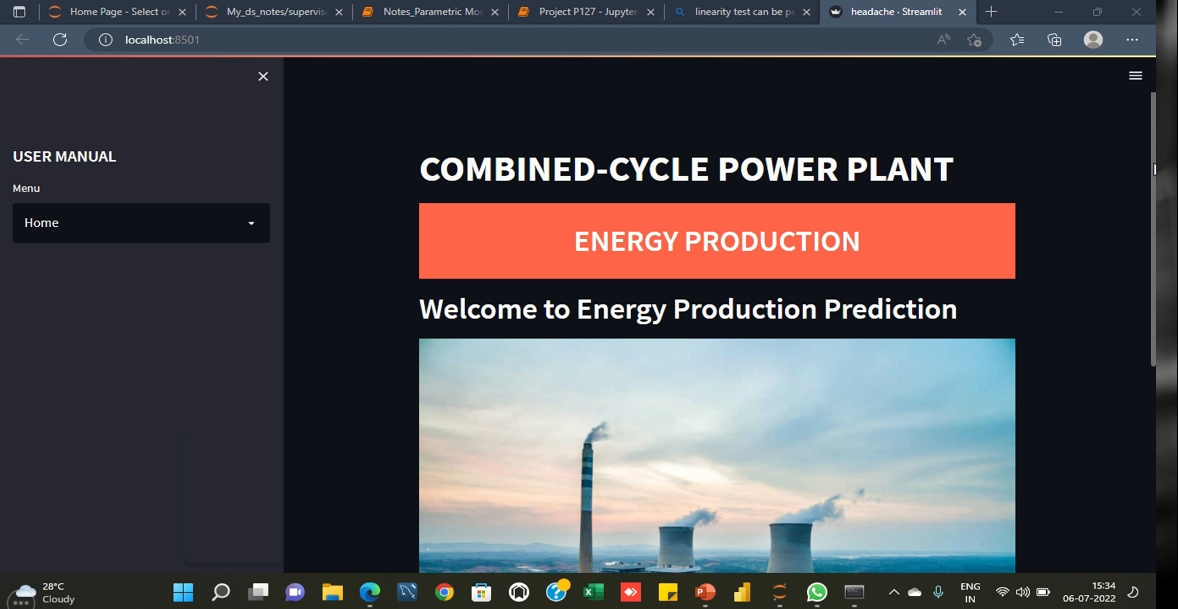

# Thank You